<a href="https://colab.research.google.com/github/durg3sh10/Deep-Learning_Based_Particle-in-Cell_Method/blob/main/PIC_DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

from PIL import Image
import os, os.path
import re
import io
import requests

import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split


from tensorflow.keras import Input, Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional,LSTM,Dense, TimeDistributed, SimpleRNN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = np.load("/content/drive/MyDrive/Dataset/PIC_dataset/x_train.npy")
x_test = np.load("/content/drive/MyDrive/Dataset/PIC_dataset/x_test.npy")
y_train = np.load("/content/drive/MyDrive/Dataset/PIC_dataset/y_train.npy")
y_test = np.load("/content/drive/MyDrive/Dataset/PIC_dataset/y_test.npy")

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(480, 217, 334, 3) (480, 16821)
(19, 217, 334, 3) (19, 16821)


In [ ]:
# a = x_train[0].astype(np.int32)

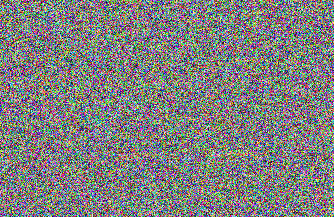

In [ ]:
# random_array = np.random.random_sample(a.shape) * 255
# random_array = random_array.astype(np.uint8)
# random_image = Image.fromarray(random_array)
# random_image

In [ ]:
# plt.imshow(data, interpolation='nearest')
# plt.show()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
# Initialize the 1st sequential model
model = Sequential(name="PIC_CNN")
input = x_train.shape[1:]
output = y_train.shape[1]

#
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input))
model.add(Conv2D(64, (3,3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#
model.add(Conv2D(128, (3,3), activation="relu", input_shape=input))
model.add(Conv2D(128, (3,3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(Conv2D(256, (3,3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


# Flatten layer
model.add(Flatten())

# Fully connected dense layer 1
model.add(Dense(1024, activation="relu"))

# Fully connected dense layer 2
model.add(Dense(1024, activation="relu"))

# # Fully connected dense layer 3
# model.add(Dense(1024, activation="relu"))

# Output layer
model.add(Dense(output, activation="linear"))
model.summary()

Model: "PIC_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 332, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 330, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 165, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 163, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 161, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 80, 128)      0         
 2D)                                                       

In [ ]:
# Compile the model
model.compile(optimizer=Adam(0.001), loss="mse", metrics=["mean_absolute_error"]) 

#  Using callback in keras
callback = tf.keras.callbacks.EarlyStopping(patience=250, monitor='val_loss',restore_best_weights=True)

# Fit the model
CNN_history = model.fit(x_train, y_train, validation_split=0.10, epochs=600, callbacks = [callback], verbose=1, batch_size = 16)

In [ ]:
filepath = "/content/drive/MyDrive/Dataset/PIC_dataset/Weights/save_model"
model.save(filepath)

from keras.models import load_model
new_model = load_model(filepath)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/PIC_dataset/Weights/save_model/assets


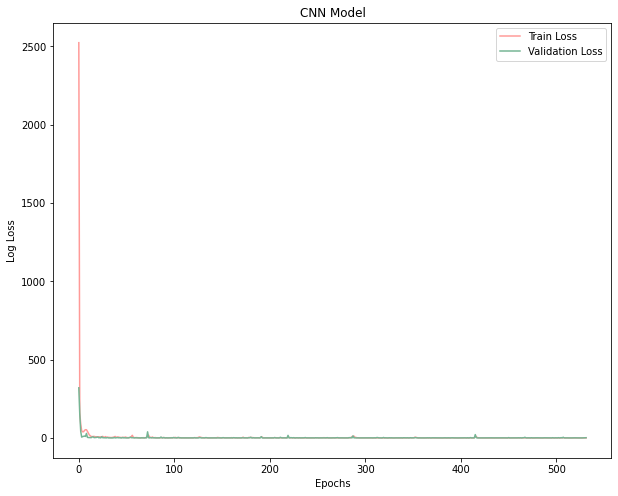

In [ ]:
# Ploting the Loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("CNN Model")
plt.plot(CNN_history.history['loss'], label='Train Loss', color='#FF9A98')
plt.plot(CNN_history.history['val_loss'],  label='Validation Loss', color='#75B594')
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

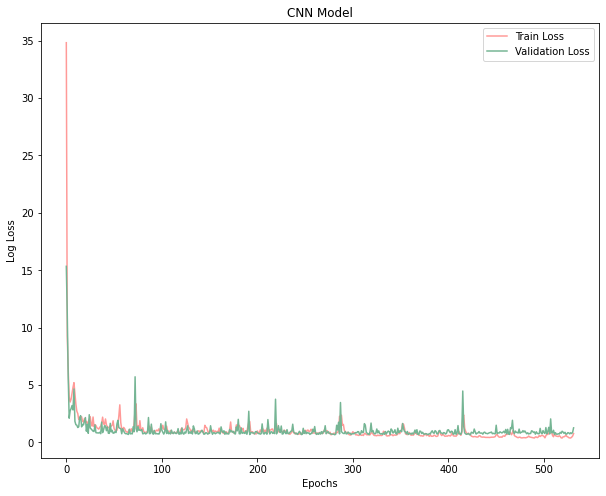

In [ ]:
# Ploting the Loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("CNN Model")
plt.plot(CNN_history.history['mean_absolute_error'], label='Train Loss', color='#FF9A98')
plt.plot(CNN_history.history['val_mean_absolute_error'],  label='Validation Loss', color='#75B594')
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[3]

array([ 0.08745889,  2.789315  ,  5.7527137 , ...,  2.1152847 ,
        1.1740198 , -0.07246258], dtype=float32)

In [ ]:
y_test[3]

array([0.      , 2.570078, 5.023417, ..., 1.925537, 1.048514, 0.      ])

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 659ms/step - loss: 1.0470 - mean_absolute_error: 0.8225


[1.0470163822174072, 0.822507917881012]

In [ ]:
#R2 (R – Squared)
r2_score(y_test, y_pred)

-5.266166245254076

In [ ]:
print(y_test.shape)
print(y_pred.shape)

(19, 16821)
(19, 16821)


#Plotting

In [ ]:
size = (21, 801)

In [ ]:
num = 3
y_pred0 = y_pred[num]
y_test0 = y_test[num]

y_test0 = y_test0.reshape(size)
y_pred0 = y_pred0.reshape(size)

print(y_test0.shape)
print(y_pred0.shape)

(21, 801)
(21, 801)


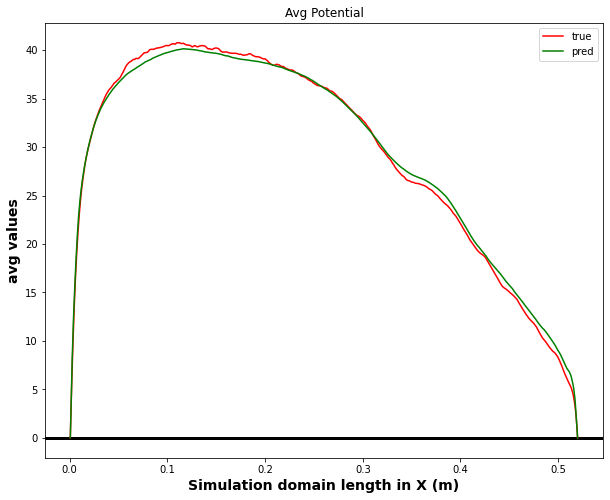

In [ ]:
fig, axs = plt.subplots()
n = y_pred0.shape[0]
m = y_pred0.shape[1]

x = np.linspace(1, n, n)*0.000649	
y = np.linspace(1, m, m)*0.000649
X, Y = np.meshgrid(y, x)

x1 = np.mean(y_test0, axis=0)
x2 = np.mean(y_pred0, axis=0)

axs.set_xlabel('Simulation domain length in X (m)',fontsize=14, fontweight='bold')
axs.set_ylabel('avg values',fontsize=14, fontweight='bold')
axs.axhline(linewidth=3, color="black")
plt.plot(y ,x1, color="r",label="true")
plt.plot(y, x2, color="g", label = "pred")
plt.legend()
plt.title("Avg Potential")
my_path = f'/content/drive/MyDrive/Dataset/PIC_dataset/outputs/avg_plot{num}.png'
plt.savefig(my_path)

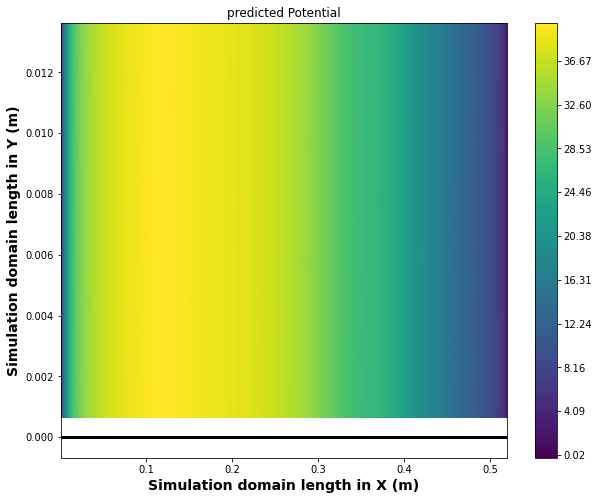

In [ ]:
maxz = np.amax(y_pred0)
minz = np.amin(y_pred0)
levels = np.linspace(minz,maxz, 150)       
fig, axs = plt.subplots()
cs = plt.contourf(X, Y, y_pred0, levels=levels)
axs.set_xlabel('Simulation domain length in X (m)',fontsize=14, fontweight='bold')
axs.set_ylabel('Simulation domain length in Y (m)',fontsize=14, fontweight='bold')
axs.axhline(linewidth=3, color="black")   
cbar = plt.colorbar(cs).set_label(label='', size=20, weight='bold')
plt.title("predicted Potential")
my_path = f'/content/drive/MyDrive/Dataset/PIC_dataset/outputs/2d_pred_plot{num}.png'
plt.savefig(my_path)

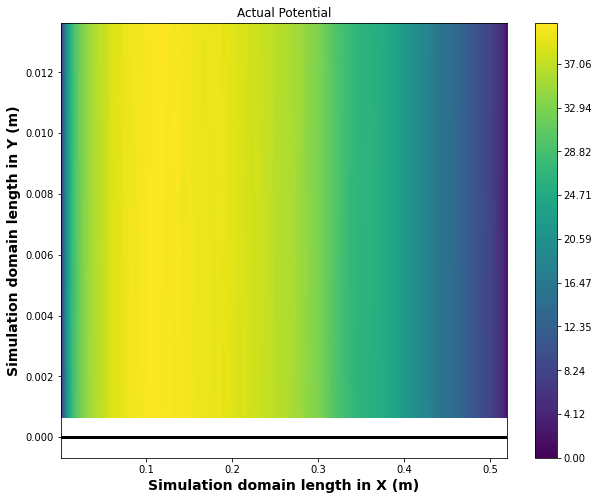

In [ ]:
maxz = np.amax(y_test0)
minz = np.amin(y_test0)
levels = np.linspace(minz,maxz, 150)       
fig, axs = plt.subplots()
cs = plt.contourf(X, Y, y_test0, levels=levels)
axs.axhline(linewidth=3, color="black")   
cbar = plt.colorbar(cs).set_label(label='', size=20, weight='bold')
axs.set_xlabel('Simulation domain length in X (m)',fontsize=14, fontweight='bold')
axs.set_ylabel('Simulation domain length in Y (m)',fontsize=14, fontweight='bold') 
plt.title("Actual Potential")
my_path = f'/content/drive/MyDrive/Dataset/PIC_dataset/outputs/2d_actual_plot{num}.png'
plt.savefig(my_path)